<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 載入需要的套件
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 用GPU 
K.tensorflow_backend._get_available_gpus()

W0630 08:40:22.645416 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0630 08:40:22.647861 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0630 08:40:22.648926 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0630 08:40:23.908868 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# 參數們
batch_size = 32
num_classes = 10
epochs = 25

In [4]:
# 載入資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape) # 50000 + 10000照片, 每張大小32x32x3(RGB)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# 改變x的資料型態（uint8 -> float32)
print('before:', x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('after:', x_train.dtype)

# 從0~255縮放到0~1
x_train /= 255
x_test /= 255

before: uint8
after: float32


In [6]:
# 幫每個類別取名子
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

original_y_train = y_train.copy()
original_y_test = y_test.copy()

# 改成onehot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(original_y_train[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


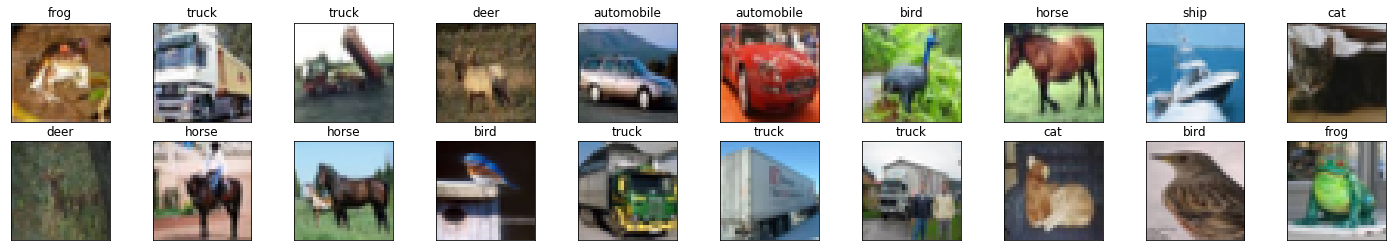

In [7]:
def imshow(img):
    plt.imshow(img)
    
# 拿前20張出來看看
images, labels = x_train[:20], original_y_train[:20]

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx][0]])

In [8]:
# 建立模型
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 優化器
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# 編譯模型
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

W0630 08:44:03.839058 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 08:44:03.892746 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0630 08:44:03.963227 140576777226112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
# 訓練模型
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

W0630 08:44:31.008476 140576777226112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 316us/step - loss: 1.6643 - acc: 0.4042 - val_loss: 1.5069 - val_acc: 0.4605
Epoch 2/25
50000/50000 [==============================] - 10s 207us/step - loss: 1.3380 - acc: 0.5240 - val_loss: 1.3103 - val_acc: 0.5283
Epoch 3/25
50000/50000 [==============================] - 11s 211us/step - loss: 1.1839 - acc: 0.5829 - val_loss: 1.1820 - val_acc: 0.5883
Epoch 4/25
50000/50000 [==============================] - 10s 206us/step - loss: 1.0710 - acc: 0.6270 - val_loss: 1.1451 - val_acc: 0.6049
Epoch 5/25
50000/50000 [==============================] - 10s 207us/step - loss: 0.9834 - acc: 0.6587 - val_loss: 1.0564 - val_acc: 0.6308
Epoch 6/25
50000/50000 [==============================] - 10s 207us/step - loss: 0.9107 - acc: 0.6836 - val_loss: 0.9778 - val_acc: 0.6646
Epoch 7/25
50000/50000 [==============================] - 10s 204us/step - loss: 0.8477 - acc: 0.7082 - val_loss: 0.

In [10]:
# 看它的正確率
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 85us/step
Test loss: 1.222516851425171
Test accuracy: 0.7355


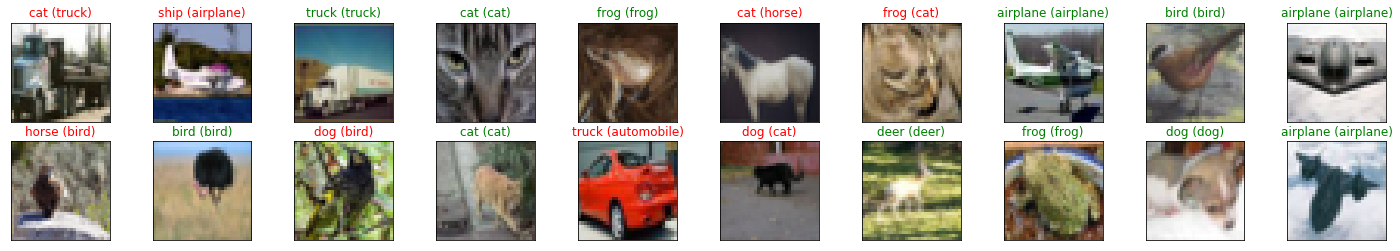

In [14]:
# 隨機取20個出來看看
idx = np.random.randint(10000, size=20)

images, labels = x_test[idx], original_y_test[idx].reshape(20,)
preds = np.argmax(model.predict(x_test[idx]), axis=1)

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]), color=("green" if preds[idx]==labels[idx] else "red"))